Import Libary

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step
Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


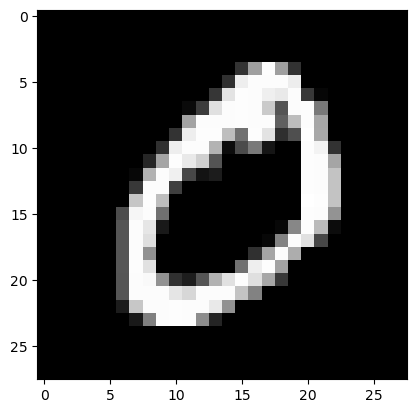

In [5]:
sample = 1
image = X_train[sample]

fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [6]:
num = 10
image = X_train[:num]
labels = y_train[:num]

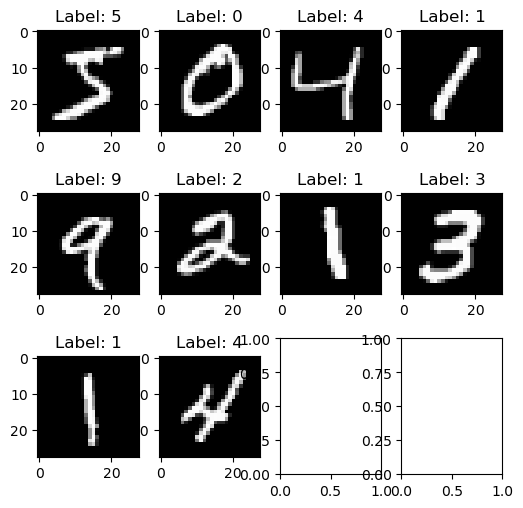

In [8]:
num_row = 3
num_col = 4

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize =(1.5*num_col,2*num_row))
for i in range(num):
  ax = axes[i//num_col, i%num_col]
  ax.imshow(image[i],cmap='gray')
  ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout
plt.show()

In [9]:
x_train_flattened = X_train.reshape(X_train.shape[0], -1) / 255.0
x_test_flattened = X_test.reshape(X_test.shape[0], -1) / 255.0

In [10]:
num_clusters = 10

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

kmeans.fit(x_train_flattened)

y_kmeans = kmeans.predict(x_test_flattened)

In [11]:
np.set_printoptions(threshold=np.inf)
print("Cluster centers:", kmeans.cluster_centers_)

Cluster centers: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   8.39922380e-05  1.83914038e-04 -2.16840434e-19 -1.46113183e-20
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.69406589e-20  5.79256814e-06  4.03307556e-04  1.00645871e-03
   1.69722246e-03  2.22579431e-03  3.07295740e-03  3.61094216e-03
   3.00344658e-03  1.71677238e-03  1.15489327e-03  2.09980595e-04
   1.83189967e-04  4.99609002e-05  5.20417043e-18  3.63207728e-18
  -2.60208521e-18  1.21972744e-19  6.43745040e-19 -5.08219768e-20
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  6.77626358e-20  3.811648

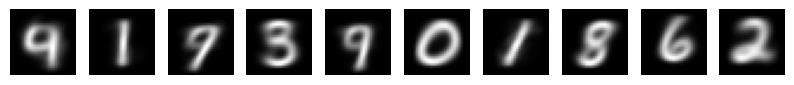

In [12]:
fig, axes = plt.subplots(1, num_clusters, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(kmeans.cluster_centers_[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.show()

In [13]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the K-Means clustering on the test data
score = silhouette_score(x_test_flattened, y_kmeans)

print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.0586


In [14]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Calculate the ARI and NMI scores
ari = adjusted_rand_score(y_test, y_kmeans)
nmi = normalized_mutual_info_score(y_test, y_kmeans)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")

Adjusted Rand Index: 0.3667
Normalized Mutual Information: 0.4926
